# Content


##### 01- [Importing Libraries](#Importing-Libraries)

##### 02- [Reading Data - Train and Test](#Reading-Data---Train-and-Test)

##### 03- [EDA Checking the data](#EDA)

##### 04- [EDA Analysing The Segments](#Analysing-The-Segments)

##### 05- [EDA Segments describtion](#segments-describtion)

##### 06- [EDA Preparing The Data](#Preparing-The-Data)

##### 07- [EDA Feature Engineering](#Feature-Engineering)

##### 08- [EDA Correlation and heatmap](#Correlation-and-heatmap)

##### 09- [Models/Experiments](#Experiments)

##### 10- [Spliting The Data](#Spliting-the-data)

##### 11- [Baseline Model - LR](#Baseline-Model)

##### 12- [Baseline Model - LR + GS](#Using-LogisticRegression-and-grid-search)

##### 13- [KNN - NOT Scaled - GS](#KNN---NOT-Scaled---GridSearch-with--the-following-parameters)

##### 14- [Decision Tree](#Decision-Tree)

##### 15- [SVM](#SVM)

##### 16- [Random Forest Classifier](#Random-Forest-Classifier)

##### 17- [PCA](#PCA)

##### 18- [XGBClassifier](#XGBClassifier)

##### 19- [Ensemble](#Ensemble-Techniques)

##### 20- [Voting Classifier](#Voting-Classifier)

##### 21- [Stacking Classifier](#Stacking-Classifier)

### [Experiements 2 - Feature Engineering 2 (combining classes)](#Working-around-target-variable-to-increase-acuraccy)

##### 22- [LogisticRegression - numerical](#LogisticRegression-2)

##### 23- [LogisticRegression - All Features](#All-Features)

##### 24- [KNN](#KNN-2)

##### 25- [Decision Tree](#Decision-Tree)

##### 26- [Random Forest](#Random-Forest)

##### 27- [Ensemble Techniques](#Ensemble-Techniques-2)

##### 28- [Voting Classifier](#Voting-Classifier-2)

##### 29- [Stacking Classifier](#Stacking-Classifier-2)

### [Experiements 3 - Fixing data imbalance](#Experiements-3---Fixing-data-imbalance)

##### 30- [SMOTE](#SMOTE)

##### 31- [Logistic Regression 3](#Logistic-Regression-3)

##### 32- [Random Forest](#Random-Forest-3)

### [Conclusion](#Conclusion:)

[End Of File](#Conclusion:)

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
 
%matplotlib inline

## Reading Data - Train and Test

In [133]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## EDA

In [134]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


##### The next two cells: checking the data for nulls, dtypes, mean...etc

In [135]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [136]:
train_data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


##### The next few cells we check the nunique values per-feature. 

In [137]:
cols_name = list(train_data.columns)
cols_name

['ID',
 'Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1',
 'Segmentation']

In [138]:
for name in cols_name:
    print(f"{name}:{train_data[name].nunique()} | dtype:{train_data[name].dtype} | values:{train_data[name].unique()}|\n")

ID:8068 | dtype:int64 | values:[462809 462643 466315 ... 465406 467299 461879]|

Gender:2 | dtype:object | values:['Male' 'Female']|

Ever_Married:2 | dtype:object | values:['No' 'Yes' nan]|

Age:67 | dtype:int64 | values:[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]|

Graduated:2 | dtype:object | values:['No' 'Yes' nan]|

Profession:9 | dtype:object | values:['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]|

Work_Experience:15 | dtype:float64 | values:[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]|

Spending_Score:3 | dtype:object | values:['Low' 'Average' 'High']|

Family_Size:9 | dtype:float64 | values:[ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]|

Var_1:7 | dtype:object | values:['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']|

Segmenta

<AxesSubplot:>

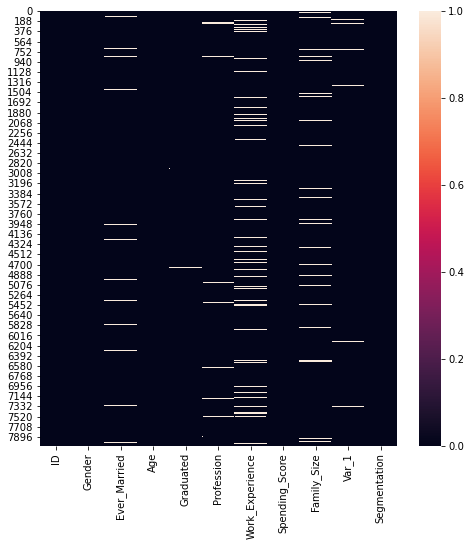

In [139]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(train_data.isna())

### Analysing The Segments 

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


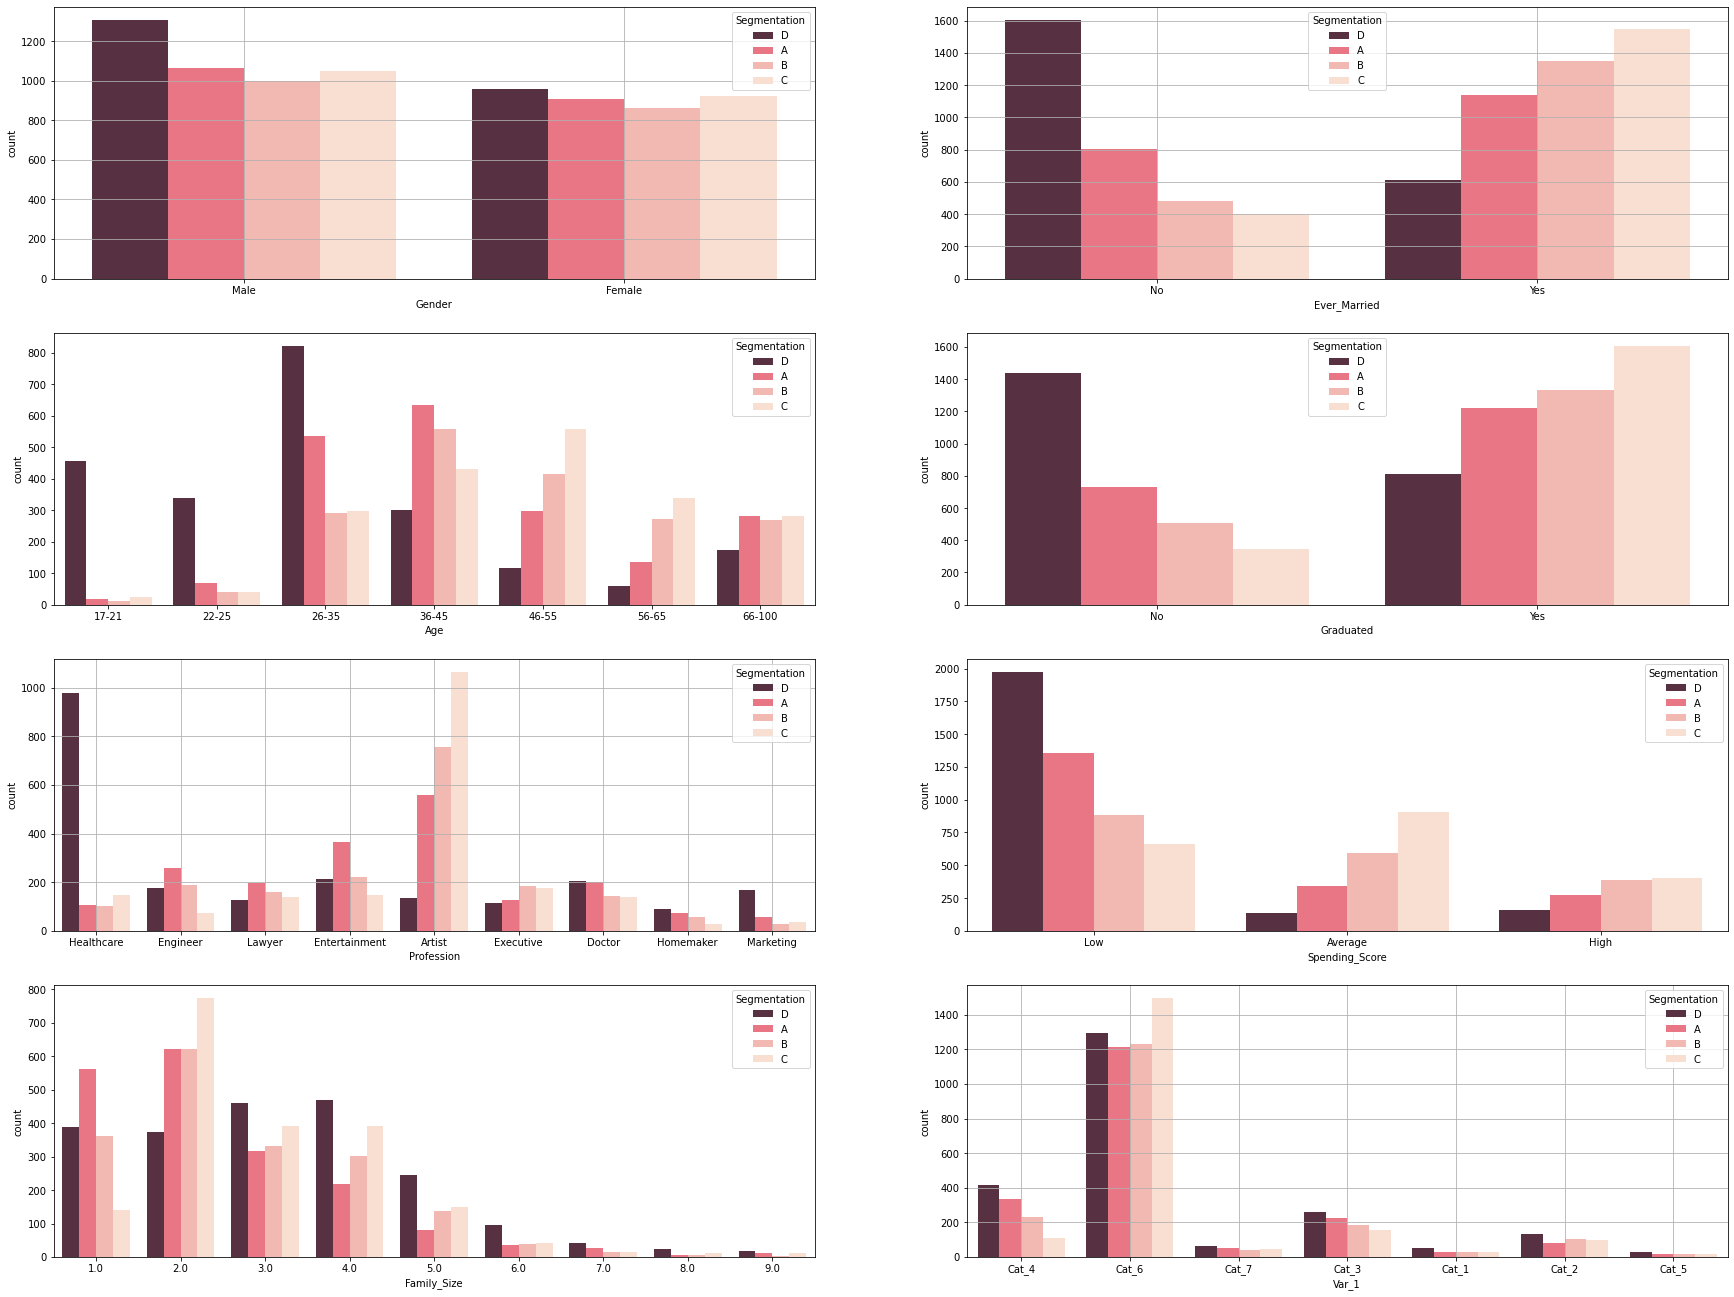

In [140]:
plt.figure(figsize=(30,23))

plt.subplot(4,2,1)
sns.countplot(train_data['Gender'].dropna(),
              hue=train_data['Segmentation'],palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])
plt.grid(True)

plt.subplot(4,2,2)
sns.countplot(train_data['Ever_Married'].dropna(),hue=train_data['Segmentation']
              ,palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])
plt.grid(True)


plt.subplot(4,2,3)
sns.countplot(pd.cut(x=train_data['Age'].dropna(), bins=[17,21,25,35,45,55,65,100], 
                     labels=["17-21","22-25","26-35",'36-45','46-55','56-65','66-100'])
              ,hue=train_data['Segmentation'],palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])

plt.subplot(4,2,4)
sns.countplot(train_data['Graduated'].dropna(),hue=train_data['Segmentation']
              ,palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])

plt.subplot(4,2,5)
sns.countplot(train_data['Profession'].dropna(),hue=train_data['Segmentation']
              ,palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])
plt.grid(True)


plt.subplot(4,2,6)
sns.countplot(train_data['Spending_Score'].dropna(),hue=train_data['Segmentation']
             ,palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])

plt.subplot(4,2,7)
sns.countplot(train_data['Family_Size'].dropna(),hue=train_data['Segmentation']
             ,palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])

plt.subplot(4,2,8)
sns.countplot(train_data['Var_1'].dropna(),hue=train_data['Segmentation']
             ,palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])
plt.grid(True)





In [141]:
train_data.groupby("Segmentation")["Gender"].value_counts(normalize=True).round(3).unstack()

Gender,Female,Male
Segmentation,,
A,0.461,0.539
B,0.463,0.537
C,0.468,0.532
D,0.423,0.577


In [142]:
train_data.groupby("Segmentation")["Spending_Score"].value_counts(normalize=True).round(3).unstack()

Spending_Score,Average,High,Low
Segmentation,,,
A,0.174,0.137,0.689
B,0.318,0.207,0.476
C,0.458,0.206,0.336
D,0.061,0.069,0.870


In [143]:
train_data.groupby("Segmentation")["Ever_Married"].value_counts(normalize=True).round(3).unstack()

Ever_Married,No,Yes
Segmentation,,
A,0.413,0.587
B,0.262,0.738
C,0.204,0.796
D,0.725,0.275


In [144]:
train_data.groupby("Segmentation")["Graduated"].value_counts(normalize=True).round(3).unstack()

Graduated,No,Yes
Segmentation,,
A,0.374,0.626
B,0.276,0.724
C,0.178,0.822
D,0.640,0.360


In [145]:
train_data.groupby("Segmentation")["Profession"].value_counts(normalize=True).round(3).unstack()

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Segmentation,,,,,,,,,
A,0.288,0.103,0.134,0.188,0.064,0.055,0.038,0.102,0.029
B,0.412,0.078,0.103,0.120,0.100,0.055,0.030,0.086,0.016
C,0.546,0.072,0.038,0.076,0.090,0.075,0.014,0.072,0.018
D,0.062,0.093,0.079,0.097,0.052,0.442,0.041,0.058,0.077


In [146]:
train_data.groupby("Segmentation")["Family_Size"].value_counts(normalize=True).round(3).unstack()

Family_Size,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Segmentation,,,,,,,,,
A,0.299,0.331,0.168,0.117,0.043,0.019,0.014,0.004,0.006
B,0.200,0.342,0.182,0.166,0.075,0.021,0.008,0.003,0.002
C,0.073,0.402,0.203,0.203,0.077,0.022,0.007,0.007,0.006
D,0.184,0.177,0.217,0.221,0.116,0.045,0.020,0.012,0.009


In [147]:
train_data.groupby("Segmentation")["Var_1"].value_counts(normalize=True).round(3).unstack()

Var_1,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
Segmentation,,,,,,,
A,0.016,0.042,0.114,0.171,0.010,0.621,0.026
B,0.014,0.057,0.101,0.126,0.011,0.668,0.023
C,0.013,0.051,0.079,0.056,0.009,0.768,0.024
D,0.022,0.060,0.115,0.185,0.012,0.578,0.028


### segments describtion 

A) 0.461 females, 0.539 males, 0.587 have married before, most are between the age of 26-45, 0.626 graduated from college, most are artists, work in the entertainment industry , or engineers, they have low spending score, most have small families, and in annonamization category 4 and 6.

B) 0.463 females, 0.537 males, 0.738 have married before, most are between the age of 36-55, 0.724 graduated from college, most are artists, work in the entertainment industry , or engineers, they have low spending score, most have small families, and in annonamization category 4 and 6.

C) 0.468 females, 0.532 males, 0.796 have married before, most are between the age of 36-55, 0.822 graduated from college, most are artists, they have average spending score, most have average sized families, and in annonamization category 4 and 6.

D) 0.423 females, 0.577 males, 0.725 have not been married before, most are younger than 35, 0.640 have not graduated from college, most are healthcare providers, they have low spending score, most have average sized families, and in annonamization category 4 and 6.


we notice that sgements B and C are very similar, the most uinque segemnt is segment D, the usual customers of this company are artists, but customers in segemnt D are mostly healthcare providers, they are young, and never been married unlike the rest of the segments. 


##### checking data balance 

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

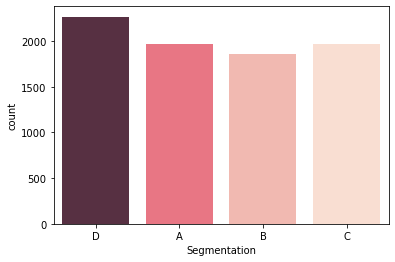

In [148]:
sns.countplot(train_data['Segmentation'] ,palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])

#### Preparing The Data

##### First lets deal with the null/nan values

In [149]:
#function to fill nulls with mode if data is categorical, and median if continous.
def fill_na(df):
    col=df.columns
    for c in col:
        if(df[c].dtypes == object):
            df[c].fillna(df[c].mode()[0],inplace=True)    
        elif (df[c].dtypes ==float):
            df[c].fillna(df[c].median(),inplace=True)

In [150]:
train_data.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [151]:
fill_na(train_data)

In [152]:
train_data.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

<AxesSubplot:>

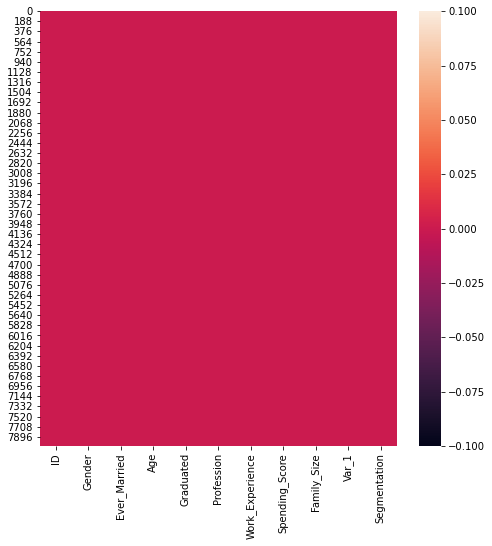

In [153]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(train_data.isna())

In [154]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


##### No more Null values

##### The ID will be ignored/dropped as it provides no help in classification. As for the ordinal values, like 'Spending_Score', will be label encoded 


In [155]:
for name in cols_name:
    print(f"{name}:{train_data[name].nunique()} | dtype:{train_data[name].dtype} | values:{train_data[name].unique()}|\n")

ID:8068 | dtype:int64 | values:[462809 462643 466315 ... 465406 467299 461879]|

Gender:2 | dtype:object | values:['Male' 'Female']|

Ever_Married:2 | dtype:object | values:['No' 'Yes']|

Age:67 | dtype:int64 | values:[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]|

Graduated:2 | dtype:object | values:['No' 'Yes']|

Profession:9 | dtype:object | values:['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']|

Work_Experience:15 | dtype:float64 | values:[ 1.  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]|

Spending_Score:3 | dtype:object | values:['Low' 'Average' 'High']|

Family_Size:9 | dtype:float64 | values:[4. 3. 1. 2. 6. 5. 8. 7. 9.]|

Var_1:7 | dtype:object | values:['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']|

Segmentation:4 | dtype:object | values:['

In [156]:
label_encoder=preprocessing.LabelEncoder()
ord_encoder=preprocessing.OrdinalEncoder()


In [157]:
label_encoder.fit(train_data['Ever_Married'])
ord_encoder.fit(train_data[['Spending_Score']])

OrdinalEncoder()

In [158]:
spend_map = {'Low':0, 'Average':1, 'High':2}
train_data.replace({"Spending_Score": spend_map}, inplace=True)
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,0,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,1,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,0,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,2,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,2,6.0,Cat_6,A


##### Changing all the Yes and NO to 1 and 0: The 'Ever_Married' and 'Graduated'

In [159]:
train_data['Ever_Married'] = label_encoder.fit_transform(train_data['Ever_Married'])
train_data['Graduated'] = label_encoder.fit_transform(train_data['Graduated'])

##### Changing Male = 1 and Female = 0 in Gender

In [160]:
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,Cat_4,D
1,462643,0,1,38,1,Engineer,1.0,1,3.0,Cat_4,A
2,466315,0,1,67,1,Engineer,1.0,0,1.0,Cat_6,B
3,461735,1,1,67,1,Lawyer,0.0,2,2.0,Cat_6,B
4,462669,0,1,40,1,Entertainment,1.0,2,6.0,Cat_6,A


##### Lets check for duplicates

In [161]:
train_data.duplicated().sum()

0

##### Drop unwanted column

In [162]:
train_data.drop(['ID'], axis=1, inplace=True)
train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,Healthcare,1.0,0,4.0,Cat_4,D
1,0,1,38,1,Engineer,1.0,1,3.0,Cat_4,A
2,0,1,67,1,Engineer,1.0,0,1.0,Cat_6,B
3,1,1,67,1,Lawyer,0.0,2,2.0,Cat_6,B
4,0,1,40,1,Entertainment,1.0,2,6.0,Cat_6,A


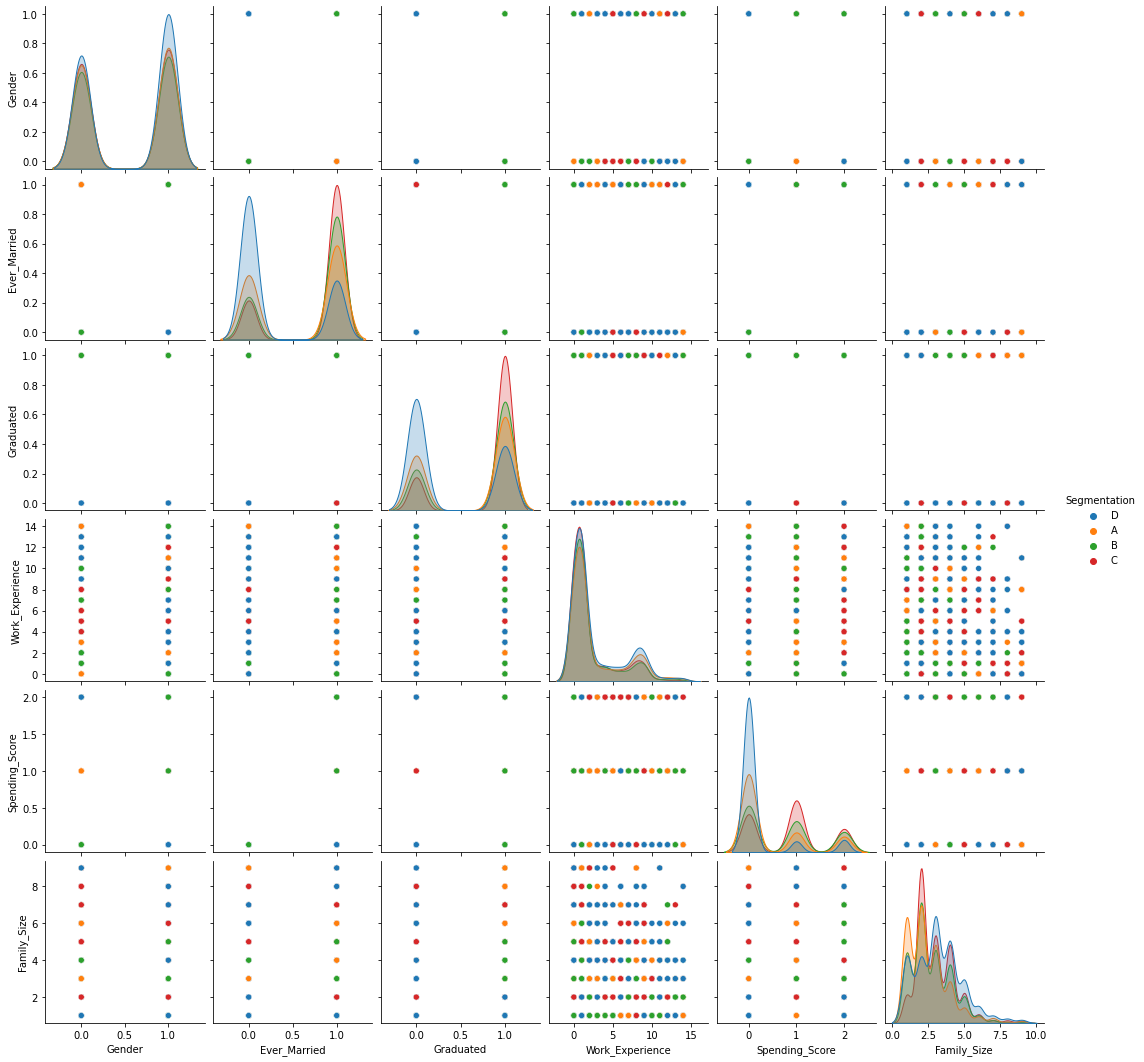

In [163]:
sns.pairplot(train_data[['Gender','Ever_Married','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1','Segmentation']], hue = 'Segmentation')

### Feature Engineering

##### Getting the min - max of the column Ages. 
##### Create groups of ages with increments of 5. ex: age:22 -> 4.

In [164]:
print(train_data['Age'].min())
print(train_data['Age'].max())

18
89


In [165]:
train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,Healthcare,1.0,0,4.0,Cat_4,D
1,0,1,38,1,Engineer,1.0,1,3.0,Cat_4,A
2,0,1,67,1,Engineer,1.0,0,1.0,Cat_6,B
3,1,1,67,1,Lawyer,0.0,2,2.0,Cat_6,B
4,0,1,40,1,Entertainment,1.0,2,6.0,Cat_6,A


In [167]:
train_data['familyCat'] = pd.cut(x=train_data['Family_Size'], bins=[0,3,5,9], labels=["0","1",'2'])

In [168]:
train_data['AgeGroup'] = pd.cut(x=train_data['Age'], bins=[17,21,25,35,45,60,100], labels=["0","1","2",'3','4','5'])

In [169]:
train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,AgeGroup,familyCat
0,1,0,22,0,Healthcare,1.0,0,4.0,Cat_4,D,1,1
1,0,1,38,1,Engineer,1.0,1,3.0,Cat_4,A,3,0
2,0,1,67,1,Engineer,1.0,0,1.0,Cat_6,B,5,0
3,1,1,67,1,Lawyer,0.0,2,2.0,Cat_6,B,5,0
4,0,1,40,1,Entertainment,1.0,2,6.0,Cat_6,A,3,2


#### casting family size to int 

In [170]:
train_data['Family_Size'] = train_data['Family_Size'].astype(int)
train_data['AgeGroup'] = train_data['AgeGroup'].astype(int)
train_data['familyCat'] = train_data['familyCat'].astype(int)

#### Changing the target to numerical

In [171]:
train_data['Segmentation'].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [172]:
train_data['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3}, inplace=True)
train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,AgeGroup,familyCat
0,1,0,22,0,Healthcare,1.0,0,4,Cat_4,3,1,1
1,0,1,38,1,Engineer,1.0,1,3,Cat_4,0,3,0
2,0,1,67,1,Engineer,1.0,0,1,Cat_6,1,5,0
3,1,1,67,1,Lawyer,0.0,2,2,Cat_6,1,5,0
4,0,1,40,1,Entertainment,1.0,2,6,Cat_6,0,3,2


In [173]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     8068 non-null   int64  
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   int64  
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   int64  
 7   Family_Size      8068 non-null   int64  
 8   Var_1            8068 non-null   object 
 9   Segmentation     8068 non-null   int64  
 10  AgeGroup         8068 non-null   int64  
 11  familyCat        8068 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 756.5+ KB


#### Getting dummies for 'Profession' and 'Var_1'

### Correlation and heatmap

<AxesSubplot:>

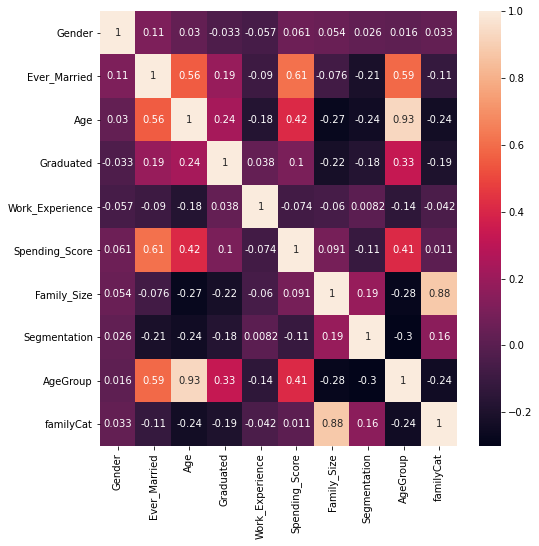

In [174]:
fig, ax = plt.subplots(figsize=(8,8)) 

sns.heatmap(train_data.corr(),annot=True)

Dropping age due to high corellation with AgeGroup, which will affect the model's performance. 

In [175]:
train_data.drop(['Age'], axis=1, inplace=True)

## Experiments

#### Spliting the data
Separating the features and target. Then splitting the data into training and validation.

In [176]:
def make_confusion_matrix(model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = model.predict(X_local)
    fraud_confusion = confusion_matrix(y_local, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d');
    plt.xlabel('prediction')
    plt.ylabel('actual')

def make_class_report(model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = model.predict(X_local)
    print(classification_report(y_local, y_predict))

In [177]:
X = train_data.drop('Segmentation', axis=1)
y = train_data['Segmentation']

In [178]:
num_list = X.select_dtypes(include=np.number).columns
cat_list = X.select_dtypes(exclude=np.number).columns

In [179]:
dummies_Var_1 = pd.get_dummies(train_data['Var_1'])
dummies_prof = pd.get_dummies(train_data['Profession'])
td_encoded = pd.concat([train_data, dummies_Var_1 , dummies_prof], axis=1)      
td_encoded.drop('Profession', axis=1 ,inplace=True)
td_encoded.drop('Var_1', axis=1 ,inplace=True)

td_encoded.head()

,Gender,Ever_Married,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,AgeGroup,familyCat,Cat_1,...,Cat_7,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,0,1.0,0,4,3,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,1.0,1,3,0,3,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,1.0,0,1,1,5,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,0.0,2,2,1,5,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,1.0,2,6,0,3,2,0,...,0,0,0,0,1,0,0,0,0,0


In [180]:
X=td_encoded.drop('Segmentation', axis=1 )

In [181]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)
X.head()

,Gender,Ever_Married,Graduated,Work_Experience,Spending_Score,Family_Size,AgeGroup,familyCat,Cat_1,Cat_2,...,Cat_7,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,0,1.0,0,4,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,1.0,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,1.0,0,1,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,0.0,2,2,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,1.0,2,6,3,2,0,0,...,0,0,0,0,1,0,0,0,0,0


## Baseline Model 

### Numerical feauters only 

In [51]:
#the 10000 iteration is to help the model converge 
lr = LogisticRegression(max_iter=2000,random_state=100)

In [52]:
lr.fit(X_train[num_list],y_train)
y_pred = lr.predict(X_train[num_list])
lr.score(X_train[num_list],y_train)

0.4666873256894949

In [53]:
lr.score(X_val[num_list],y_val)

0.4634448574969021

### BaseModel - All features 


In [54]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
lr.score(X_train,y_train)

0.5185931205453982

In [55]:
lr.score(X_val,y_val)

0.5198265179677819

Getting the scaler and apply fit + transform

In [56]:
ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_val = ss.transform(X_val)

In [57]:
lr.fit(scaled_X_train,y_train)
lr.score(scaled_X_train,y_train)

0.5187480632166098

In [58]:
#lr.predict(scaled_X_val)
lr.score(scaled_X_val,y_val)

0.5192069392812887

OMD

##### Using LogisticRegression and grid-search
###### Not Scaled

In [59]:
param_grid = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [60]:
lr = LogisticRegression()

In [61]:
lsgr = GridSearchCV(lr,param_grid,cv=10)
lsgr.fit(X_train,y_train)
lsgr.score(X_train,y_train)

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

0.5182832352029749

In [62]:
lsgr.score(X_val,y_val)

0.516728624535316

###### Scaled

In [63]:
lsgr.fit(scaled_X_train,y_train)
lsgr.score(scaled_X_train,y_train)

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

0.5190579485590332

In [64]:
lsgr.score(scaled_X_val,y_val)

0.5198265179677819

###### KNN - NOT Scaled - GridSearch with  the following parameters
n_neighbors with increment of 3 starting 0(excluded) up to 100 |
weights: uniform and distance |
metric: euclidean and manhattan 
cv: 5 |
verbose = 3 |
n_jobs= -1

In [65]:
neighbors = [i for i in range(0,100,3)][1:]
parameters = {'n_neighbors':neighbors, 'weights':['uniform','distance'], 'metric':['euclidean','manhattan']}
model = KNeighborsClassifier()

gs = GridSearchCV(model, parameters, cv=15, n_jobs=-1)
gs.fit(X_train, y_train)

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=15, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30,
                                         33, 36, 39, 42, 45, 48, 51, 54, 57, 60,
                                         63, 66, 69, 72, 75, 78, 81, 84, 87, 90, ...],
                         'weights': ['uniform', 'distance']})

In [66]:
print('best_estimator_ :', gs.best_estimator_)
print('best_params_ :', gs.best_params_)
print('best_score_ :', gs.best_score_)

best_estimator_ : KNeighborsClassifier(metric='manhattan', n_neighbors=81)
best_params_ : {'metric': 'manhattan', 'n_neighbors': 81, 'weights': 'uniform'}
best_score_ : 0.5074357452472167


In [67]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=81 ,weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=81)

In [68]:
print(f' training accuracy: {knn.score(X_train,y_train)}')
print(f' validation accuracy: {knn.score(X_val,y_val)}')

 training accuracy: 0.5224666873256895
 validation accuracy: 0.5247831474597274


###### KNN - Scaled - GridSearch with the following parameters 
n_neighbors with increment of 3 starting 0(excluded) up to 100 |
weights: uniform and distance |
metric: euclidean and manhattan 
cv: 5 |
verbose = 3 |
n_jobs= -1

In [69]:
neighbors = [i for i in range(0,100,3)][1:]
parameters = {'n_neighbors':neighbors, 'weights':['uniform','distance'], 'metric':['euclidean','manhattan']}
model = KNeighborsClassifier()

gs = GridSearchCV(model, parameters, cv=15, n_jobs=-1)
gs.fit(scaled_X_train, y_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30,
                                         33, 36, 39, 42, 45, 48, 51, 54, 57, 60,
                                         63, 66, 69, 72, 75, 78, 81, 84, 87, 90, ...],
                         'weights': ['uniform', 'distance']})

In [70]:
print('best_estimator_ :', gs.best_estimator_)
print('best_params_ :', gs.best_params_)
print('best_score_ :', gs.best_score_)

best_estimator_ : KNeighborsClassifier(metric='manhattan', n_neighbors=69)
best_params_ : {'metric': 'manhattan', 'n_neighbors': 69, 'weights': 'uniform'}
best_score_ : 0.5069796219356464


In [71]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=69 ,weights='uniform')
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=69)

In [72]:
print(f' training accuracy: {knn.score(scaled_X_train,y_train)}')
print(f' validation accuracy: {knn.score(scaled_X_val,y_val)}')

 training accuracy: 0.5237062286953827
 validation accuracy: 0.5142503097893433


### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 7).fit(X_train, y_train)
dtree_model.score(X_train, y_train)

0.5497365974589402

In [74]:
parameters = {'criterion':['gini','entropy'], 'max_depth':np.arange(3, 10),'max_leaf_nodes': list(range(2, 100))
              , 'min_samples_split': [2, 3, 4]}
dtree_model = DecisionTreeClassifier()
gs = GridSearchCV(dtree_model , parameters, cv=15, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [75]:
print('best_estimator_ :', gs.best_estimator_)
print('best_params_ :', gs.best_params_)
print('best_score_ :', gs.best_score_)

best_estimator_ : DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=32)
best_params_ : {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 32, 'min_samples_split': 2}
best_score_ : 0.5134732639076243


In [76]:
dtree_model = DecisionTreeClassifier(criterion= 'entropy', max_depth=8, max_leaf_nodes=32, min_samples_split= 2)
dtree_model.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=32)

In [77]:
print(f' training accuracy: {dtree_model.score(X_train,y_train)}')
print(f' validation accuracy: {dtree_model.score(X_val,y_val)}')

 training accuracy: 0.5220018593120546
 validation accuracy: 0.5340768277571252


### SVM

In [99]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True,gamma="auto", random_state=42)
svm_clf.fit(X_train, y_train)
print(svm_clf.score(X_train, y_train))
print(svm_clf.score(X_val, y_val))

0.5509761388286334
0.5433705080545229


### Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=200, min_samples_leaf=6,oob_score=True, warm_start=True, 
                           max_samples=int(X_train.shape[0]/2),random_state=25)

clf.fit(X_train,y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_val, y_val))

0.5861481251936783
0.5600991325898389


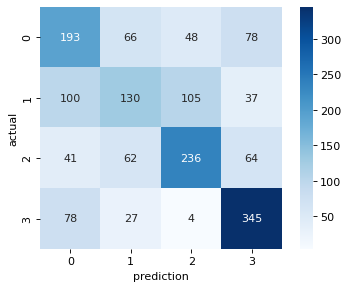

In [80]:
make_confusion_matrix(clf,X_val, y_val)

In [81]:
from sklearn.metrics import classification_report
make_class_report(clf,X_val, y_val)

              precision    recall  f1-score   support

           0       0.47      0.50      0.48       385
           1       0.46      0.35      0.40       372
           2       0.60      0.59      0.59       403
           3       0.66      0.76      0.71       454

    accuracy                           0.56      1614
   macro avg       0.55      0.55      0.54      1614
weighted avg       0.55      0.56      0.55      1614



### PCA 

In [82]:
ss = StandardScaler()
ss.fit(X_train)
ss_x_train=ss.transform(X_train)
ss_x_val=ss.transform(X_val)

In [83]:
pca = PCA(n_components=22)
principalComponents = pca.fit_transform(ss_x_train)

In [84]:
pca_x_train = pca.transform(ss_x_train)
pca_x_test = pca.transform(ss_x_val)

In [85]:
logisticRegr = LogisticRegression()

In [86]:
logisticRegr.fit(pca_x_train, y_train)

LogisticRegression()

In [87]:
y_pred = logisticRegr.predict(pca_x_train)
logisticRegr.score(pca_x_train,y_train)

0.5187480632166098

In [88]:
logisticRegr.score(pca_x_test,y_val)

0.5192069392812887

###  XGBClassifier

In [89]:
param = {'eta': 0.3,
     'n_estimators': 600,
     'gamma': 2.0,
     'max_depth': 3,
     'min_child_weight': 1.0,
     'subsample': 0.8,
     'max_delta_step': 0.0,
     'colsample_bytree': 1.0,
     'lambda': 1.0,
     'alpha': 1.0,
     'num_class': 3,
     'eval_metric': "mlogloss",
     'objective': "multi:softprob",
     'num_boost_round': 20,
     'early_stopping_rounds': 50, }

In [90]:
from xgboost import XGBClassifier

gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='multi:softprob', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

 

eval_set=[(X_train,y_train),(X_val,y_val)]

fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    early_stopping_rounds=50,
                    verbose=True,
                    
                   )

accuracy_score(y_val, gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit)) 

[09:12:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.36808	validation_1-mlogloss:1.36778
[1]	validation_0-mlogloss:1.35147	validation_1-mlogloss:1.35069
[2]	validation_0-mlogloss:1.33651	validation_1-mlogloss:1.33579
[3]	validation_0-mlogloss:1.32175	validation_1-mlogloss:1.32103
[4]	validation_0-mlogloss:1.30785	validation_1-mlogloss:1.30691
[5]	validation_0-mlogloss:1.29465	validation_1-mlogloss:1.29354
[6]	validation_0-mlogloss:1.28210	validation_1-mlogloss:1.28060
[7]	validation_0-mlogloss:1.27159	validation_1-mlogloss:1.26995


/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[8]	validation_0-mlogloss:1.26106	validation_1-mlogloss:1.25907
[9]	validation_0-mlogloss:1.25099	validation_1-mlogloss:1.24873
[10]	validation_0-mlogloss:1.24185	validation_1-mlogloss:1.23977
[11]	validation_0-mlogloss:1.23268	validation_1-mlogloss:1.23055
[12]	validation_0-mlogloss:1.22413	validation_1-mlogloss:1.22236
[13]	validation_0-mlogloss:1.21592	validation_1-mlogloss:1.21402
[14]	validation_0-mlogloss:1.20829	validation_1-mlogloss:1.20649
[15]	validation_0-mlogloss:1.20106	validation_1-mlogloss:1.19923
[16]	validation_0-mlogloss:1.19402	validation_1-mlogloss:1.19218
[17]	validation_0-mlogloss:1.18783	validation_1-mlogloss:1.18602
[18]	validation_0-mlogloss:1.18185	validation_1-mlogloss:1.18027
[19]	validation_0-mlogloss:1.17577	validation_1-mlogloss:1.17413
[20]	validation_0-mlogloss:1.17004	validation_1-mlogloss:1.16868
[21]	validation_0-mlogloss:1.16484	validation_1-mlogloss:1.16358
[22]	validation_0-mlogloss:1.15980	validation_1-mlogloss:1.15848
[23]	validation_0-mlogloss:

0.5508054522924412

In [91]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [98]:
xgbModel = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='multi:softprob')

In [ ]:
param_comb =50

random_search = RandomizedSearchCV(xgbModel, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=42)

random_search.fit(X_train, y_train) 

In [ ]:
print('Best score:')
print(random_search.best_score_)

In [ ]:
print('Best estimator:')
print(random_search.best_estimator_)

In [ ]:
tuned_xgb = random_search.best_estimator_

## Ensemble Techniques

### Voting Classifier 

In [115]:
def get_voting():
	# define the base models
	models = list()
	models.append(('lr', lsgr))
	models.append(('knn', knn))
	models.append(('rf', clf))
	models.append(('svm', svm_clf))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='soft')
	return ensemble

In [116]:
votingEn = get_voting()
votingEn.fit(X_train,y_train)

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

VotingClassifier(estimators=[('lr',
                              GridSearchCV(cv=10,
                                           estimator=LogisticRegression(),
                                           param_grid={'C': [0.001, 0.009, 0.01,
                                                             0.09, 1, 5, 10,
                                                             25],
                                                       'penalty': ['l1',
                                                                   'l2']})),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=69)),
                             ('rf',
                              RandomForestClassifier(max_samples=3227,
                                                     min_samples_leaf=6,
                                                     n_estimators=200,
                                     

In [117]:
print(f' training accuracy: {votingEn.score(X_train,y_train)}')
print(f' validation accuracy: {votingEn.score(X_val,y_val)}')

 training accuracy: 0.5593430430740626
 validation accuracy: 0.550185873605948


### Stacking Classifier 

In [128]:
def get_stacking():
	# define the base models
	models = list()
	models.append(('lr', lsgr))
	models.append(('knn', knn))
	models.append(('rf', clf))
	models.append(('svm', svm_clf))
	final = LogisticRegression()
	# define the voting ensemble
	ensemble = StackingClassifier(estimators=models, final_estimator=final, cv=10)
	return ensemble

In [129]:
stackingEn = get_stacking()
stackingEn.fit(X_train,y_train)

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

StackingClassifier(cv=10,
                   estimators=[('lr',
                                GridSearchCV(cv=10,
                                             estimator=LogisticRegression(),
                                             param_grid={'C': [0.001, 0.009,
                                                               0.01, 0.09, 1, 5,
                                                               10, 25],
                                                         'penalty': ['l1',
                                                                     'l2']})),
                               ('knn',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=69)),
                               ('rf',
                                RandomForestClassifier(max_samples=3227,
                                                       min_samples_leaf=6,
                                                      

In [130]:
print(f' training accuracy: {stackingEn.score(X_train,y_train)}')
print(f' validation accuracy: {stackingEn.score(X_val,y_val)}')

 training accuracy: 0.5680198326619151
 validation accuracy: 0.5582403965303594


## Working around target variable to increase acuraccy

if we looked at the segments describtion, we'll notice high similiarty between classes B and C:

B) 0.463 females, 0.537 males, 0.738 have married before, most are between the age of 36-55, 0.724 graduated from college, most are artists, work in the entertainment industry , or engineers, they have low spending score, most have small families, and in annonamization category 4 and 6.

C) 0.468 females, 0.532 males, 0.796 have married before, most are between the age of 36-55, 0.822 graduated from college, most are artists, they have average spending score, most have average sized families, and in annonamization category 4 and 6.

this similiarty might be a contributing factor to low accuracy score, so we'll combine the two segments and see how that affects the results. 



In [314]:
td_new =train_data.copy(deep=True)   

td_new.head()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,AgeGroup,familyCat
0,1,0,0,Healthcare,1.0,0,4,Cat_4,3,1,1
1,0,1,1,Engineer,1.0,1,3,Cat_4,0,3,0
2,0,1,1,Engineer,1.0,0,1,Cat_6,1,5,0
3,1,1,1,Lawyer,0.0,2,2,Cat_6,1,5,0
4,0,1,1,Entertainment,1.0,2,6,Cat_6,0,3,2


In [315]:
td_new['Segmentation'] = td_new['Segmentation'].astype(str)

In [316]:
td_new['Segmentation'].replace({'0':0,'2':1,'3':2}, inplace=True)

In [317]:
td_new.head()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,AgeGroup,familyCat
0,1,0,0,Healthcare,1.0,0,4,Cat_4,2,1,1
1,0,1,1,Engineer,1.0,1,3,Cat_4,0,3,0
2,0,1,1,Engineer,1.0,0,1,Cat_6,1,5,0
3,1,1,1,Lawyer,0.0,2,2,Cat_6,1,5,0
4,0,1,1,Entertainment,1.0,2,6,Cat_6,0,3,2


In [318]:
X2 = td_new.drop('Segmentation', axis=1)
y2 = td_new['Segmentation']

In [319]:
dummies_Var_1 = pd.get_dummies(td_new['Var_1'])
dummies_prof = pd.get_dummies(td_new['Profession'])
td2_encoded = pd.concat([td_new, dummies_Var_1 , dummies_prof], axis=1)      
td2_encoded.drop('Profession', axis=1 ,inplace=True)
td2_encoded.drop('Var_1', axis=1 ,inplace=True)

td2_encoded.head()

,Gender,Ever_Married,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,AgeGroup,familyCat,Cat_1,...,Cat_7,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,0,1.0,0,4,2,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,1.0,1,3,0,3,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,1.0,0,1,1,5,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,0.0,2,2,1,5,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,1.0,2,6,0,3,2,0,...,0,0,0,0,1,0,0,0,0,0


In [320]:
X2=td2_encoded.drop('Segmentation', axis=1 )

In [321]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2, random_state=13)
X2.head()

,Gender,Ever_Married,Graduated,Work_Experience,Spending_Score,Family_Size,AgeGroup,familyCat,Cat_1,Cat_2,...,Cat_7,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,0,1.0,0,4,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,1.0,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,1.0,0,1,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,0.0,2,2,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,1.0,2,6,3,2,0,0,...,0,0,0,0,1,0,0,0,0,0


### Numerical features only 

### LogisticRegression 2

In [322]:
#the 10000 iteration is to help the model converge 
lr = LogisticRegression(max_iter=2000,random_state=100)

In [323]:
lr.fit(X2_train[num_list],y2_train)
y_pred = lr.predict(X2_train[num_list])
lr.score(X2_train[num_list],y2_train)

0.603656647040595

In [324]:
lr.score(X2_val[num_list],y2_val)

0.6003717472118959

### All Features 

In [325]:
lr.fit(X2_train,y2_train)
y_pred = lr.predict(X2_train)
lr.score(X2_train,y2_train)

0.6428571428571429

In [326]:
lr.score(X2_val,y2_val)

0.6462205700123915

## KNN 2

In [327]:
knn.fit(X2_train,y2_train)
print(f' training accuracy: {knn.score(X2_train,y2_train)}')
print(f' validation accuracy: {knn.score(X2_val,y2_val)}')

 training accuracy: 0.6377440347071583
 validation accuracy: 0.6344485749690211


## Decision Tree

In [328]:
dtree_model.fit(X2_train,y2_train)
print(f' training accuracy: {dtree_model.score(X2_train,y2_train)}')
print(f' validation accuracy: {dtree_model.score(X2_val,y2_val)}')

 training accuracy: 0.6468856523086458
 validation accuracy: 0.6517967781908303


## Random Forest

In [329]:
param_grid = { 
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
}


rfc=RandomForestClassifier(random_state=25)
Grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
Grid_rfc.fit(X2_train,y2_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=25),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [330]:
Grid_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [331]:
rfc1=RandomForestClassifier(random_state=25, max_features='auto', n_estimators= 100, max_depth=8, criterion='entropy')
rfc1.fit(X2_train,y2_train)
print(rfc1.score(X2_train, y2_train))
print(rfc1.score(X2_val, y2_val))

0.6986365044933375
0.6579925650557621


## Ensemble Techniques 2

### Voting Classifier 2

In [332]:
votingEn.fit(X2_train,y2_train)

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

VotingClassifier(estimators=[('lr',
                              GridSearchCV(cv=10,
                                           estimator=LogisticRegression(),
                                           param_grid={'C': [0.001, 0.009, 0.01,
                                                             0.09, 1, 5, 10,
                                                             25],
                                                       'penalty': ['l1',
                                                                   'l2']})),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=69)),
                             ('rf',
                              RandomForestClassifier(max_samples=3227,
                                                     min_samples_leaf=6,
                                                     n_estimators=200,
                                     

In [333]:
print(f' training accuracy: {votingEn.score(X2_train,y2_train)}')
print(f' validation accuracy: {votingEn.score(X2_val,y2_val)}')

 training accuracy: 0.6585063526495197
 validation accuracy: 0.6468401486988847


### Stacking Classifier 2

In [334]:
stackingEn.fit(X2_train,y2_train)

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

StackingClassifier(cv=10,
                   estimators=[('lr',
                                GridSearchCV(cv=10,
                                             estimator=LogisticRegression(),
                                             param_grid={'C': [0.001, 0.009,
                                                               0.01, 0.09, 1, 5,
                                                               10, 25],
                                                         'penalty': ['l1',
                                                                     'l2']})),
                               ('knn',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=69)),
                               ('rf',
                                RandomForestClassifier(max_samples=3227,
                                                       min_samples_leaf=6,
                                                      

In [335]:
print(f' training accuracy: {stackingEn.score(X2_train,y2_train)}')
print(f' validation accuracy: {stackingEn.score(X2_val,y2_val)}')

 training accuracy: 0.6820576386736907
 validation accuracy: 0.6567534076827757


### Experiements 3 - Fixing data imbalance

since we merged 2 segments, we need to fix the impalance we intreduced to the data.

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

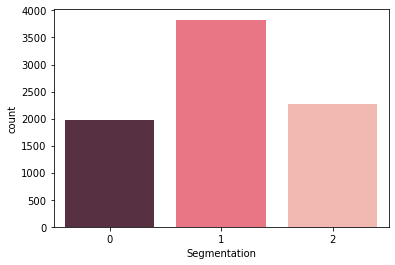

In [336]:
sns.countplot(td_new['Segmentation'] ,palette=['#5D2A42',"#FB6376",'#FCB1A6',"#FFDCCC"])

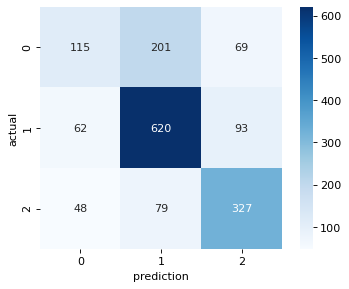

In [337]:
make_confusion_matrix(rfc1,X2_val, y2_val)

#### SMOTE 

In [ ]:
td_new['Segmentation'].value_counts()

In [346]:
X3 = td_new.drop('Segmentation', axis=1)
y3 = td_new['Segmentation']

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (5000) in class 0 will be larger than the number of samples in the majority class (class #1 -> 3828)
  warnings.warn(
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (4100) in class 1 will be larger than the number of samples in the majority class (class #1 -> 3828)
  warnings.warn(
/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (4000) in class 2 will be larger than the number of samples in the majority class (class #1 -> 3828)
  warnings.warn(


Class=2, n=4000 (30.534%)
Class=0, n=5000 (38.168%)
Class=1, n=4100 (31.298%)


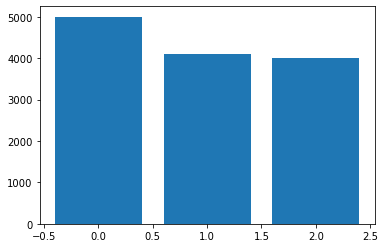

In [391]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where

# define dataset
strategy = {0:5000, 1:4100, 2:4000}
oversample = SMOTE(sampling_strategy=strategy)
X3, y3 = oversample.fit_resample(X2, y2)
# summarize distribution
counter = Counter(y3)
for k,v in counter.items():
	per = v / len(y3) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [348]:
dummies_Var_1 = pd.get_dummies(X3['Var_1'])
dummies_prof = pd.get_dummies(X3['Profession'])
X3 = pd.concat([X3, dummies_Var_1 , dummies_prof], axis=1)      
X3.drop('Profession', axis=1 ,inplace=True)
X3.drop('Var_1', axis=1 ,inplace=True)

X3.head()

,Gender,Ever_Married,Graduated,Work_Experience,Spending_Score,Family_Size,AgeGroup,familyCat,Cat_1,Cat_2,...,Cat_7,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,0,1.0,0,4,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,1.0,1,3,3,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,1.0,0,1,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,0.0,2,2,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,1.0,2,6,3,2,0,0,...,0,0,0,0,1,0,0,0,0,0


In [436]:
X3_train, X3_val, y3_train, y3_val = train_test_split(X3, y3, test_size=0.2, random_state=10)


### Logistic Regression 3

In [437]:
lr = LogisticRegression(max_iter=2000,random_state=30)

In [438]:
lr.fit(X3_train,y3_train)
lr.score(X3_train,y3_train)

0.6518129770992367

In [439]:
lr.score(X3_val,y3_val)

0.6458015267175573

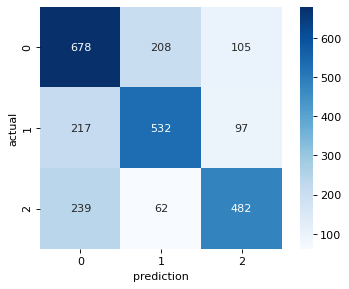

In [440]:
make_confusion_matrix(lr,X3_val, y3_val)

In [443]:
make_class_report(lr,X2_val, y2_val)

              precision    recall  f1-score   support

           0       0.41      0.58      0.48       385
           1       0.74      0.63      0.68       775
           2       0.71      0.64      0.68       454

    accuracy                           0.62      1614
   macro avg       0.62      0.62      0.61      1614
weighted avg       0.65      0.62      0.63      1614



In [442]:
make_class_report(lr,X3_val, y3_val)

              precision    recall  f1-score   support

           0       0.60      0.68      0.64       991
           1       0.66      0.63      0.65       846
           2       0.70      0.62      0.66       783

    accuracy                           0.65      2620
   macro avg       0.66      0.64      0.65      2620
weighted avg       0.65      0.65      0.65      2620



### Random Forest 3

In [445]:
rfc1.fit(X3_train,y3_train)
print(rfc1.score(X3_train, y3_train))
print(rfc1.score(X3_val, y3_val))

0.6851145038167938
0.6709923664122137


### Conclusion:

The best model based on val score is the Random-Forest-3 which uses the data of classes 0,1,2 instead of 0,1,2,3 being classes B(1) and class C(2) combined into one class 1. Then data is balanced using upscale since the combining for the classes B and C caused the imbalance.


[Start Of File](#Content)